# Importing libraries

In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

In [2]:
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()

# Neural Network Module and Training Function

In [5]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        self.a1 = None
        self.l1 = None
        self.l2 = None
        
    def forward(self, x):
        self.l1 = self.linear1(x)
        self.a1 = sigmoid(self.l1)
        self.l2 = self.linear2(self.a1)
        yhat = sigmoid(self.l2)
        return yhat

In [6]:
def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total += loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            PlotStuff(X, Y, model, epoch)
            plt.show()
            model(X)
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

# Prepare Data

In [7]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [15]:
Y

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

# Defining and Training Model

In [8]:
# Cross Entropy
def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

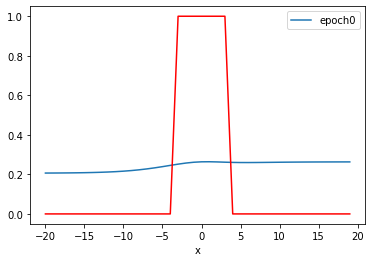

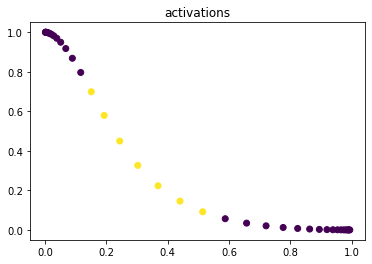

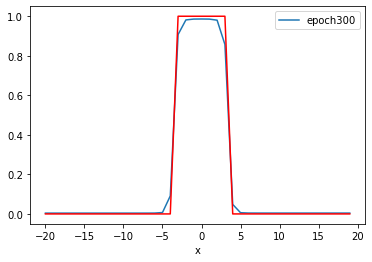

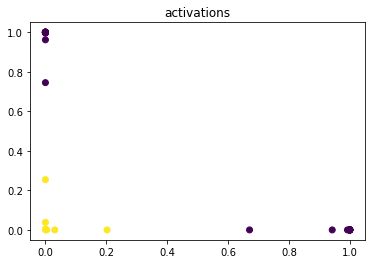

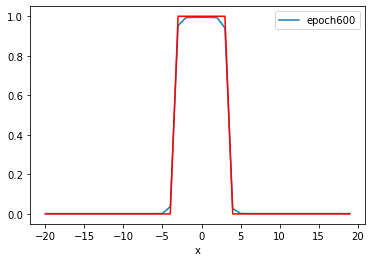

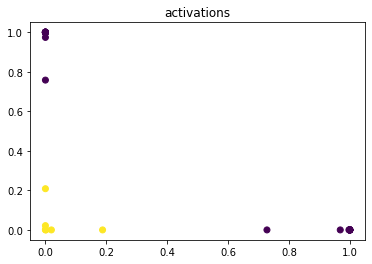

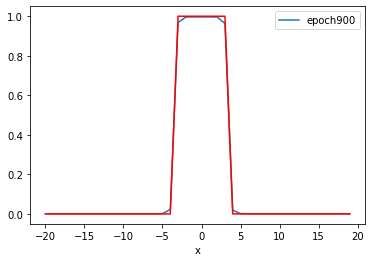

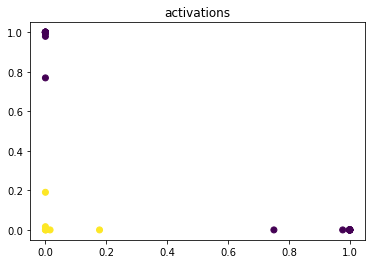

In [9]:
D_in = 1
H = 2
D_out = 1
learning_rate = 0.1
model = Net(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs = 1000)

Text(0.5, 1.0, 'cross entropy loss')

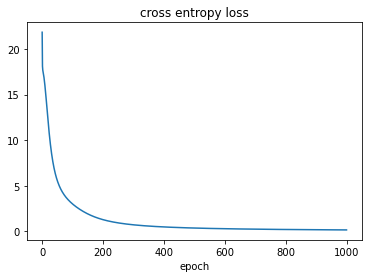

In [10]:
plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

In [11]:
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([0.9969], grad_fn=<SigmoidBackward>)

In [12]:
X_ = torch.tensor([[0.0],[2.0],[3.0]])
Yhat = model(X_)
Yhat

tensor([[0.9969],
        [0.9963],
        [0.9680]], grad_fn=<SigmoidBackward>)

In [13]:
Yhat = Yhat > 0.5
Yhat

tensor([[True],
        [True],
        [True]])